<a href="https://colab.research.google.com/github/uwsd/2018-datascience-lectures/blob/master/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random

In [3]:
[random.randint(0, 100) for i in range(5)]

[93, 62, 2, 53, 22]

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [6]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print (X_full.shape)
print (Y.shape)

(506, 13)
(506,)


In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)
X = X_full[:, selector.get_support()]
print (X.shape)

(506, 1)


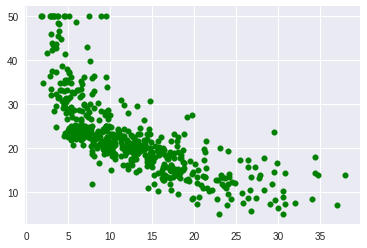

In [12]:
def plot_scatter(X,Y,R=None):
    plt.scatter(X, Y, s=32, marker='o', facecolors='green')
    if R is not None:
            plt.scatter(X, R, color='red', linewidth=0.5)
    plt.show()

plot_scatter(X,Y)

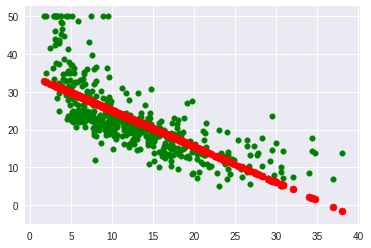

In [13]:
regressor = LinearRegression(normalize=True).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))